# Статистика, DS-поток
## Практическое задание 9


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.
**Баллы за задание:**

* Задача 1 &mdash; 40 балла;
* Задача 2 &mdash; 40 балла;
* Задача 3 &mdash; 20 балла;
* Задача 4 &mdash; 80 баллов;
* Задача 5 &mdash; 120 баллов;
* Задача 6 &mdash; 120 баллов.

**Важность задач:**

* *высокая:* задачи 1, 3, 5;
* *средняя:* задачи 4, 6;
* *обычная:* задача 2.

**Напоминание:** Тяжелые графики обычно рисуются на белом фоне, легкие графики — на сером. К тяжелым графикам относятся графики с закрашенными областями, остальные можно отнести к легким графикам.

*Замечание.* В решении стоит использовать **готовые реализации критериев из** `scipy.stats`. При возникновении затруднений посмотрите в ноутбук с занятия.

___
### Задача 1.

Вспомним недавнее тренировочное соревнование, задание 3.8, задача 3, в котором сравнивались ваши предсказания цены на жилье по имеющимся данным .

Возьмите предсказания вашей отправленной модели для тестовой выборки из соревнования (если не отсылали, то из задачи 2 того же задания). Для метрик MSE, MAE, MAPE постройте бутстрепные доверительные интервалы трех типов.

**Решение:**

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import random
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, palette='Set2')
from tqdm.notebook import tqdm

In [50]:
preds = pd.read_csv('submission_cb_2.csv')
answers = pd.read_csv('test_target.csv')

In [51]:
values = np.array(preds['price'])
answers = np.array(answers['price'])

mse_test = mean_squared_error(answers, values)
mae_test = mean_absolute_error(answers, values)
mape_test = mean_absolute_percentage_error(answers, values)

Нормальные интервалы.

In [89]:
alpha = 0.95
n = len(preds)
samples = []
B = n
for i in range(B):
    samples.append(list(np.random.randint(low=0, high=n, size=n)))
    
samples = np.array(samples)

mse_values = []
mae_values = []
mape_values = []

for i in range(B):
    mse_values.append(mean_squared_error(answers[samples[i]], values[samples[i]]))
    mae_values.append(mean_absolute_error(answers[samples[i]], values[samples[i]]))
    mape_values.append(mean_absolute_percentage_error(answers[samples[i]], values[samples[i]]))
    
mse_values = np.array(mse_values)
mae_values = np.array(mae_values)
mape_values = np.array(mape_values)

In [100]:
def norm_interv(theta, z, v_boost):
    return (np.round(theta - z * np.sqrt(v_boost), 5), np.round(theta + z * np.sqrt(v_boost), 5))

In [101]:
z = sps.norm().ppf((1 + alpha) / 2)
print('Нормальный бутсрепный интервал для MSE: {}'.format(norm_interv(mse_test, z, np.var(mse_values))))
print('Нормальный бутсрепный интервал для MAE: {}'.format(norm_interv(mae_test, z, np.var(mae_values))))
print('Нормальный бутсрепный интервал для MAPE: {}'.format(norm_interv(mape_test, z, np.var(mape_values))))

Нормальный бутсрепный интервал для MSE: (11401223815.22745, 14262254758.95147)
Нормальный бутсрепный интервал для MAE: (63131.4282, 67426.32969)
Нормальный бутсрепный интервал для MAPE: (0.11658, 0.12281)


Центральные интервалы.

In [131]:
alpha = 0.95
n = len(values)
B = n

left = int(np.ceil(B * (1 + alpha) / 2))
right = int(np.floor(B * (1 - alpha) / 2))

mse_values_sort = np.sort(mse_values)
mae_values_sort = np.sort(mae_values)
mape_values_sort = np.sort(mape_values)

mse_interv = (np.round(2 * mse_test - mse_values_sort[left], 5), np.round(2 * mse_test - mse_values_sort[right], 5))
mae_interv = (np.round(2 * mae_test - mae_values_sort[left], 5), np.round(2 * mae_test - mae_values_sort[right], 5))
mape_interv = (np.round(2 * mape_test - mape_values_sort[left], 5), np.round(2 * mape_test - mape_values_sort[right], 5))

print('Центральный бутсрепный интервал для MSE: {}'.format(mse_interv))
print('Центральный бутсрепный интервал для MAE: {}'.format(mae_interv))
print('Центральный бутсрепный интервал для MAPE: {}'.format(mape_interv))

Центральный бутсрепный интервал для MSE: (11327547718.2882, 14198020560.18316)
Центральный бутсрепный интервал для MAE: (63077.66506, 67386.74218)
Центральный бутсрепный интервал для MAPE: (0.11645, 0.12278)


Квантильные интервалы.

In [132]:
alpha = 0.95
n = len(values)
B = n

left = int(np.floor(B * (1 - alpha) / 2))
right = int(np.ceil(B * (1 + alpha) / 2))

mse_interv = (np.round(mse_values_sort[left], 5), np.round(mse_values_sort[right], 5))
mae_interv = (np.round(mae_values_sort[left], 5), np.round(mae_values_sort[right], 5))
mape_interv = (np.round(mape_values_sort[left], 5), np.round(mape_values_sort[right], 5))

print('Квантильный бутсрепный интервал для MSE: {}'.format(mse_interv))
print('Квантильный бутсрепный интервал для MAE: {}'.format(mae_interv))
print('Квантильный бутсрепный интервал для MAPE: {}'.format(mape_interv))

Квантильный бутсрепный интервал для MSE: (11465458013.99576, 14335930855.89072)
Квантильный бутсрепный интервал для MAE: (63171.01572, 67480.09283)
Квантильный бутсрепный интервал для MAPE: (0.11661, 0.12293)


**Вывод:** Все три подхода дают очень похожие доверительные интервалы, поэтому нельзя выделить лучший подход. Но в целом можно, сказать, что данными способами можно оценивать необходимые статистики намного легче, чем мы делали это раньше.

___
### Задача 2.

**1.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $\widehat{F}_n$ и посчитайте **точное** значение статистики 

$$D_n = \sup\limits_{x \in \mathbb{R}} \left| \widehat{F}_n(x) - F(x) \right|.$$

Обоснуйте, почему при вашей реализации подсчета статистики полученное значение будет **точным**.

Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле?


Для выполнения задания можно использовать следующую функцию:

На лекции мы показали, что эмпирическая функция распределения ступенчатая. Также мы знаем, что функция распределения нормального распределения возрастает. Поэтому нам необходимо рассмотреть два случая: супремум будет достигаться либо при какой нибудь точке из выборки, либо при пределе слева от точек выборки.

In [2]:
from statsmodels.distributions.empirical_distribution import ECDF
# help(ECDF)  # В случае затруднений раскомментировать и выполнить

In [16]:
n = 10000
epsilon = 1e-6

sample = sps.norm().rvs(size=n)
D = []
for i in range(1, n + 1):
    limit = abs(ECDF(sample[:i])(sample[:i] - epsilon) - sps.norm().cdf(sample[:i] - epsilon))
    sample_x = abs(ECDF(sample[:i])(sample[:i]) - sps.norm().cdf(sample[:i]))
    ans = np.amax(np.array([limit, sample_x]))
    D.append(max(sample_x))

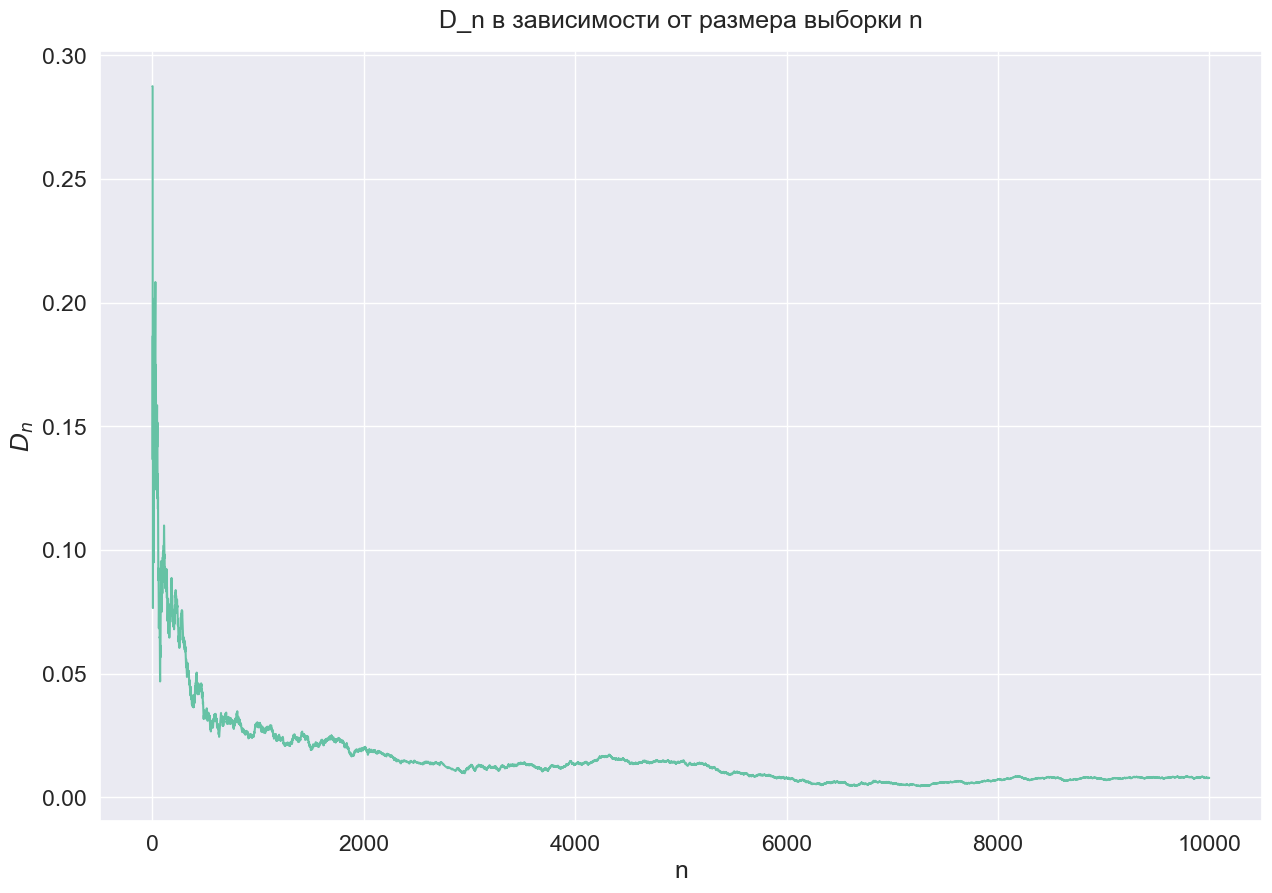

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(n), D)
plt.xlabel('n')
plt.ylabel('$D_n$')
plt.title('D_n в зависимости от размера выборки n', y=1.02);

**Вывод:** $D_n$ действительно стремится к 0 при n стремящемся к $+\infty$, причем почти наверное, что и подтверждает теоретические данные (а именно теорему Гливенко Кантелли).

___
### Задача 3.

Студенты периодически отправляют запросы в бот. Иногда бот бывает недоступен,
поэтому студенты с некоторыми интервалами повторяют запросы до тех пор, пока
бот не ответит. Известно, что $52$ запроса дошли с первой попытки, $31$ &mdash; со второй, $3$
&mdash; с третьей, а для доставки еще $5$ запросов потребовалось более $4$ попыток. Верно
ли, что бот получает запросы с вероятностью $\frac{2}{3}$?

**Решение:**

**Вывод:** <...>

____
### Задача 4.

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий для генерации выборки $U\{1, ..., 10\}$, аналогично разобранному на семинаре. Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения.

<...>

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.
**Решение:**

1. На семинаре мы проверяли два разных критерия, чтобы исключить случай, когда мы думаем, что величины генерируются случайно, но на самом деле это не так (например когда числа просто идут по порядку).

In [19]:
sample_size = 500
size = 10
alpha = 1 - 0.95
sample = sps.randint(1, size + 1).rvs(size=sample_size)
mu = []
counts, mu = np.unique(sample, return_counts=True)
p_0 = 1 / size
chi2 = np.sum((mu - sample_size * p_0)**2 / (sample_size * p_0))

In [20]:
if (sample_size < 50):
    print('Сгенерийруйте выборку больше')
    
elif (sample_size * p_0 < 5):
    print('Сгенерийруйте выборку еще раз')

Односторонний критерий.

In [21]:
z = sps.chi2(size - 1).ppf(1 - alpha)
if (chi2 >= z):
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


Двустронний критерий.

In [22]:
z_left = sps.chi2(size - 1).ppf(alpha / 2)
z_right = sps.chi2(size - 1).ppf(1 - alpha / 2)
if (chi2 <= z_left or chi2 >= z_right):
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


2.

In [23]:
sample_size = 500
mu = 5
sample = sps.poisson(mu=mu).rvs(size=sample_size)
counts, mu = np.unique(sample, return_counts=True)
p_0 = sps.poisson(mu=mu).pmf(counts)

In [24]:
if (sample_size < 50):
    print('Сгенерийруйте выборку больше')
    
elif (np.sum(sample_size * p_0 < 5) == 0):
    print('Сгенерийруйте выборку еще раз')

In [28]:
chi2 = np.sum((mu - sample_size * p_0)**2 / (sample_size * p_0))
z = sps.chi2(size - 1).ppf(1 - alpha)
if (chi2 >= z):
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


**Вывод:**

В первом случае мы построили два критерия (как на семинаре) и увидели, что гипотеза не отвергается при обоих критериях, что хорошо. Во втором же случае наша гипотеза отвергается. Возможно это связано с тем, что при некоторых $j$ $\mu_j$ очень мало.

__________________
### Задача 5.

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка.

Cуществует модификация критерия Колмогорова для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можете воспользоваться им, например, взяв реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>, или же применять для конкретной $F_0$ критерий Колмогорова, пример использования которого можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинарах разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100.

*Подсказка:*

In [ ]:
max_sample_size = ...
sample_count = ...
is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = ...
        is_reject_<критерий>[i, j] = ...

Ваша реализация:

In [304]:
from statsmodels.stats.diagnostic import lilliefors
alpha = 1 - 0.95
max_sample_size = 100
sample_count = 500
is_reject_lilliefors = np.zeros((max_sample_size, sample_count))
is_reject_jarka_bera = np.zeros((max_sample_size, sample_count))
is_reject_shapiro_wilk = np.zeros((max_sample_size, sample_count))
samples = sps.norm().rvs(size=(sample_count, max_sample_size))

for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = samples[j, :i]
        is_reject_lilliefors[i, j] = lilliefors(x=sample, dist='norm', pvalmethod='table')[1] <= alpha
        is_reject_jarka_bera[i, j] = sps.jarque_bera(x=sample)[1] <= alpha
        is_reject_shapiro_wilk[i, j] = sps.shapiro(x=sample)[1] <= alpha

  0%|          | 0/95 [00:00<?, ?it/s]

Поясните, почему вы выбрали такое значение `sample_count`.

Логично, что чем больше sample_count, тем лучше, но очень большим брать тоже не стоит, чтобы считалось недолго.

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

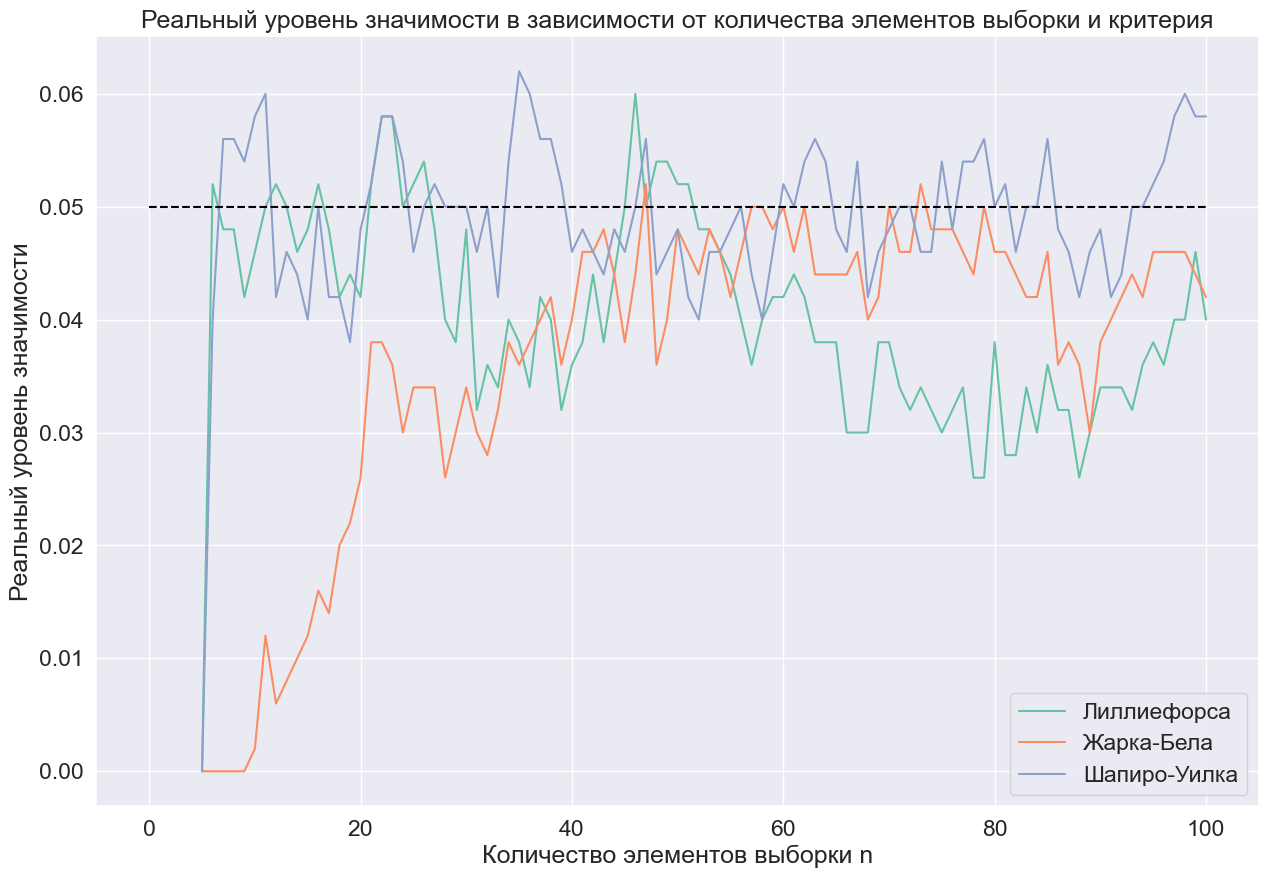

In [305]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(5, max_sample_size + 1), is_reject_lilliefors[4:].mean(axis=1), label='Лиллиефорса')
plt.plot(np.arange(5, max_sample_size + 1), is_reject_jarka_bera[4:].mean(axis=1), label='Жарка-Бела')
plt.plot(np.arange(5, max_sample_size + 1), is_reject_shapiro_wilk[4:].mean(axis=1), label='Шапиро-Уилка')
plt.hlines(y=alpha, xmin=0, xmax=100, color='black', linestyles='dashed')
plt.legend()
plt.xlabel('Количество элементов выборки n')
plt.ylabel('Реальный уровень значимости')
plt.title('Реальный уровень значимости в зависимости от количества элементов выборки и критерия');

Какой можно сделать вывод?

При увеличении количества элементов выборки реальные уровни значимости всех критериев находятся в небольшой окрестности от $\alpha = 0.05$. Не вижу, чтобы можно было выделить какой то из критериев, так как их поведение очень похоже.

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [307]:
alpha = 1 - 0.95
max_sample_size = 100
sample_count = 500
is_reject_lilliefors = np.zeros((max_sample_size, sample_count))
is_reject_jarka_bera = np.zeros((max_sample_size, sample_count))
is_reject_shapiro_wilk = np.zeros((max_sample_size, sample_count))
samples = sps.cauchy().rvs(size=(sample_count, max_sample_size))

for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = samples[j, :i]
        is_reject_lilliefors[i, j] = lilliefors(x=sample, dist='norm', pvalmethod='table')[1] <= alpha
        is_reject_jarka_bera[i, j] = sps.jarque_bera(x=sample)[1] <= alpha
        is_reject_shapiro_wilk[i, j] = sps.shapiro(x=sample)[1] <= alpha

  0%|          | 0/95 [00:00<?, ?it/s]

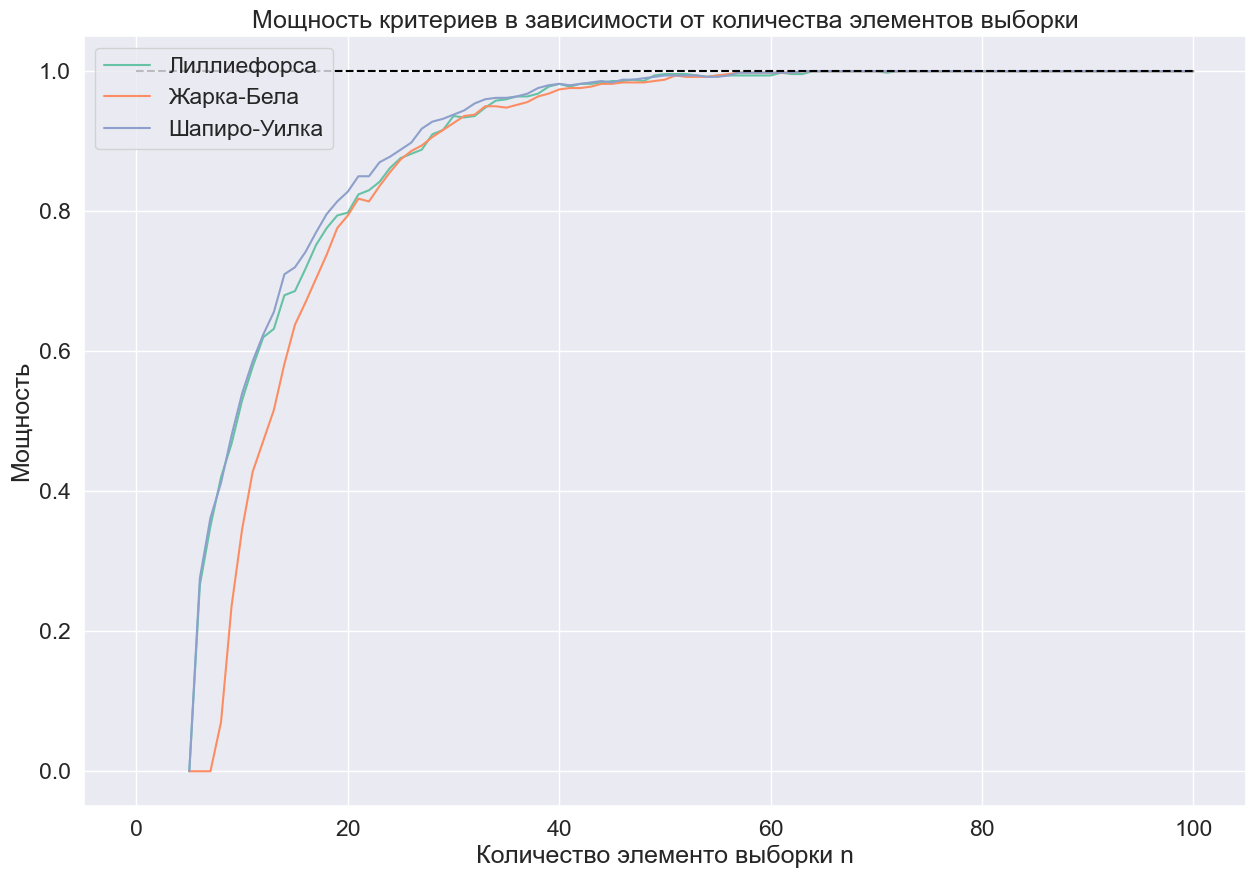

In [308]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(5, max_sample_size + 1), is_reject_lilliefors[4:].mean(axis=1), label='Лиллиефорса')
plt.plot(np.arange(5, max_sample_size + 1), is_reject_jarka_bera[4:].mean(axis=1), label='Жарка-Бела')
plt.plot(np.arange(5, max_sample_size + 1), is_reject_shapiro_wilk[4:].mean(axis=1), label='Шапиро-Уилка')
plt.hlines(y=1, xmin=0, xmax=100, color='black', linestyles='dashed')
plt.legend()
plt.xlabel('Количество элементо выборки n')
plt.ylabel('Мощность')
plt.title('Мощность критериев в зависимости от количества элементов выборки');

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

Из графика видно, что наиболее мощным является критерий Шапиро-Уилка (как и говорилось на лекции), так как быстрее всего сходится к 1. Мощность остальных критериев тоже находится очень близко к нему и сходятся к 1.

**3.** Распределение Стьюдента является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 
Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно посчитать функцию. Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от количества степеней свободы для каждого критерия. Не забудьте добавить легенду и подписать оси.

In [313]:
alpha = 1 - 0.95
size = 50
max_sample_d = 10
sample_count = 500
is_reject_lilliefors = np.zeros((max_sample_d, sample_count))
is_reject_jarka_bera = np.zeros((max_sample_d, sample_count))
is_reject_shapiro_wilk = np.zeros((max_sample_d, sample_count))
samples = []
for i in range(max_sample_d):
    samples.append(sps.t(i + 1).rvs(size=(sample_count, size)))
samples = np.array(samples)

for i in tqdm(range(max_sample_d)):
    for j in range(sample_count):
        sample = samples[i, j]
        is_reject_lilliefors[i, j] = lilliefors(x=sample, dist='norm', pvalmethod='table')[1] <= alpha
        is_reject_jarka_bera[i, j] = sps.jarque_bera(x=sample)[1] <= alpha
        is_reject_shapiro_wilk[i, j] = sps.shapiro(x=sample)[1] <= alpha

  0%|          | 0/10 [00:01<?, ?it/s]

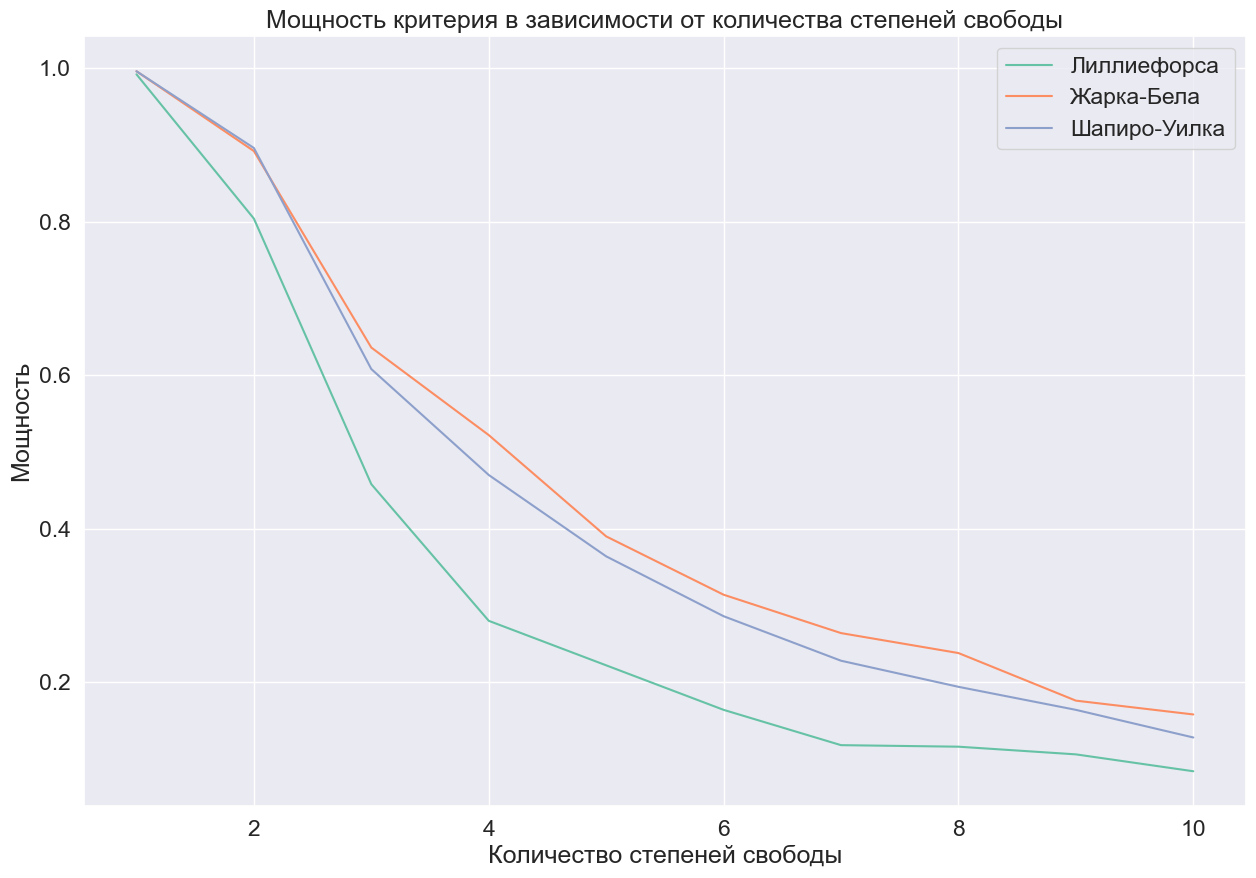

In [314]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(max_sample_d) + 1, is_reject_lilliefors.mean(axis=1), label='Лиллиефорса')
plt.plot(np.arange(max_sample_d) + 1, is_reject_jarka_bera.mean(axis=1), label='Жарка-Бела')
plt.plot(np.arange(max_sample_d) + 1, is_reject_shapiro_wilk.mean(axis=1), label='Шапиро-Уилка')
plt.legend()
plt.xlabel('Количество степеней свободы')
plt.ylabel('Мощность')
plt.title('Мощность критерия в зависимости от количества степеней свободы');

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы.

Мощности всех критериев убывают при увеличении количества степеней свободы, это и логично, так как тогда распределение Стьюдента становится больше похоже на нормальное. Медленнее всего убывает мощность критерия Жарка-Бела, а быстрее всего - Лиллиефорса.

**4.** Аналогичным образом посчитайте мощности критериев, если альтернативная гипотеза заключается в том, что выборка имеет экспоненциальное распределение. Постройте график зависимости мощности от параметра альтернативной гипотезы.

In [310]:
alpha = 1 - 0.95
size = 50
max_sample_d = 10
sample_count = 500
is_reject_lilliefors = np.zeros((max_sample_d, sample_count))
is_reject_jarka_bera = np.zeros((max_sample_d, sample_count))
is_reject_shapiro_wilk = np.zeros((max_sample_d, sample_count))
samples = []
for i in range(max_sample_d):
    samples.append(sps.expon(1 / (i + 1)).rvs(size=(sample_count, size)))
samples = np.array(samples)

for i in tqdm(range(max_sample_d)):
    for j in range(sample_count):
        sample = samples[i, j]
        is_reject_lilliefors[i, j] = lilliefors(x=sample, dist='norm', pvalmethod='table')[1] <= alpha
        is_reject_jarka_bera[i, j] = sps.jarque_bera(x=sample)[1] <= alpha
        is_reject_shapiro_wilk[i, j] = sps.shapiro(x=sample)[1] <= alpha

  0%|          | 0/10 [00:00<?, ?it/s]

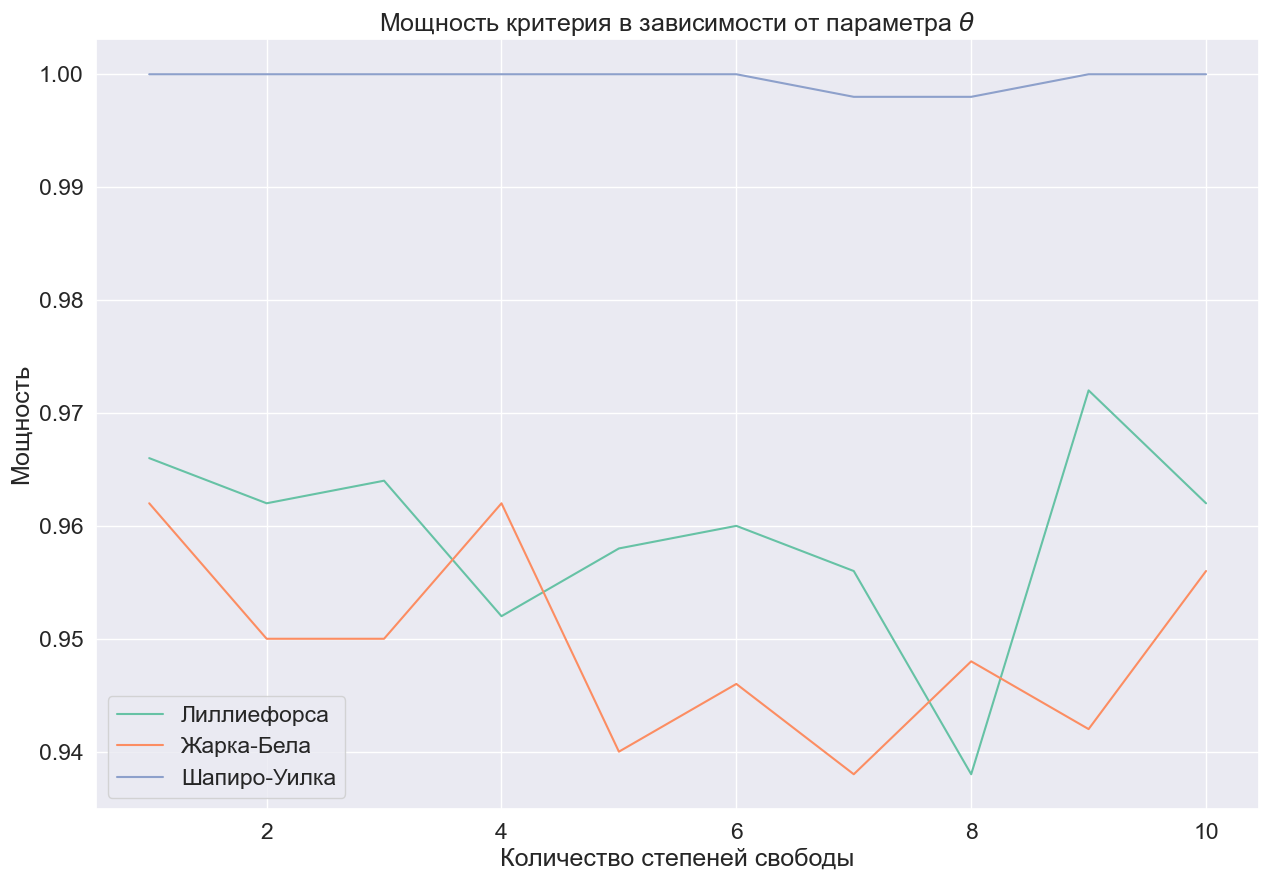

In [312]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(max_sample_d) + 1, is_reject_lilliefors.mean(axis=1), label='Лиллиефорса')
plt.plot(np.arange(max_sample_d) + 1, is_reject_jarka_bera.mean(axis=1), label='Жарка-Бела')
plt.plot(np.arange(max_sample_d) + 1, is_reject_shapiro_wilk.mean(axis=1), label='Шапиро-Уилка')
plt.legend()
plt.xlabel('Количество степеней свободы')
plt.ylabel('Мощность')
plt.title('Мощность критерия в зависимости от параметра $\\theta$');

Сделайте вывод:

Из графика видно, что мощность критерия Шапиро-Уилка самая большая, она очень близка к 1. Мощности остальных критериев сильно колеблются около 0.95.

___________
### Задача 6.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>, взяв все колонки, кроме `Class`. В дальнейшем будем называть колонки признаками.

In [ ]:
<...>

Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько столбцов, используя `plt.subplot`.

In [ ]:
<...>

Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** <...>

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. Помочь в этом может теоретическое домашнее задание 10.

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** <...>

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:** <...>

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** <...>

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** <...>

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:** <...>

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [ ]:
<...>

Для каких признаков нормальность не отвергается?

**Ответ:** <...>

**Вывод:** <...>